### Summer 2023: Data Visualization

#### Final project - Load data

This project creates visualizations for average annual salaries for earners who complete different education levels.
Education levels range from "Not a high school graduate" up to "Advanced degree".

Author: --<br>
Email: ---

My overall idea is to show growth in salary over the years by each level of completed education, placing emphasis on the value of advanced degrees.

I can show this by loading data provided by the US Census. Downloaded from here:

https://www.census.gov/data/tables/time-series/demo/educational-attainment/cps-historical-time-series.html

The table name:

`Table A-3. Mean Earnings of Workers 18 Years and Over, by Educational Attainment, Race, Hispanic Origin, and Sex: 1975 to 2022`

Their data ranges from 1975 to 2021. I'm not sure if I need to include this entire range in my final visualizations but I'll do some trial and error to determine if including all years of available.

The second main idea is to highlight how higher education level factors into the projected fastest growing jobs as reported by the United States Bureau of Labor Statistics.

I was able to join the education level to the respective occupation. The US BLS has a table with the top 30 occupations with highest percent employment change from 2021-31 but I could expand their report to the top 50 or more by their data found here: https://www.bls.gov/emp/data/occupational-data.htm

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import os
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
import math
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
import math

In [3]:
#!pip install openpyxl

**Import US Census income by education level data in Table A-3**

The table contains average annual salaries by year for all levels of education.

In [8]:
# salaries_df = pd.read_excel('data/Census-edu_attainment_taba-3.xlsx', skiprows=3)
# salaries_df.head(10)

**Drop and clean up column names**

In [ ]:
# Drop all columns with Standard error since that data is not relevant.
salaries_df.drop(salaries_df.columns[[3, 6, 9, 12, 15, 18]],axis = 1, inplace=True)
salaries_df.head()

Rename all columns to a new list instead of changing one by one

In [ ]:
new_columns = ['year','total_earners','total_earners_salary', 
               'no_high_school_earners', 'no_high_school_salary', 
               'high_school_earners', 'high_school_salary', 
               'some_college_earners', 'some_college_salary',
              'bachelors_earners', 'bachelors_salary', 
               'adv_earners', 'adv_salary']
salaries_df.columns = new_columns
salaries_df.head()

In [ ]:
# Drop the first two rows
salaries_df.drop([0,1], inplace=True)

In [ ]:
salaries_df.iloc[42:53]

Keep only top 49 rows which are for both genders and all races. The lower tables slice up the date by gender and race.

In [ ]:
# Drop all rows after row 49. In other words keep only rows 1 to 48
salaries_df = salaries_df.iloc[0:47]
salaries_df.reset_index(inplace=True, drop=True)
salaries_df.head()

In [ ]:
salaries_df.tail()

Check for any null values

In [ ]:
salaries_df.isnull().sum()

In [ ]:
salaries_df.to_csv('data/salary_clean.csv', index=False)

<hr>

#### Export clean data for other notebooks

In [25]:
import pandas as pd

# Load the data
file_path = './data/salary_clean.csv'
salaries_df = pd.read_csv(file_path, index_col='year', parse_dates=['year'])

# Display the first few rows of the dataframe to understand its structure
salaries_df.head()

,total_earners,total_earners_salary,no_high_school_earners,no_high_school_salary,high_school_earners,high_school_salary,some_college_earners,some_college_salary,bachelors_earners,bachelors_salary,adv_earners,adv_salary
year,,,,,,,,,,,,
2021-01-01,165282,63050,10886,31050,43930,42850,44019,48070,41873,80380,24572,110600
2020-01-01,164611,72520,10985,35940,42240,39498,45240,44176,41910,73499,24236,104833
2019-01-01,167216,52380,11414,22810,42599,39371,46886,45091,42153,73163,24164,106766
2018-01-01,165179,64340,12058,31870,42882,38936,46887,43053,40231,71155,23118,99919
2017-01-01,163871,74320,12240,36980,42816,38145,47382,41507,39153,67763,22277,98369


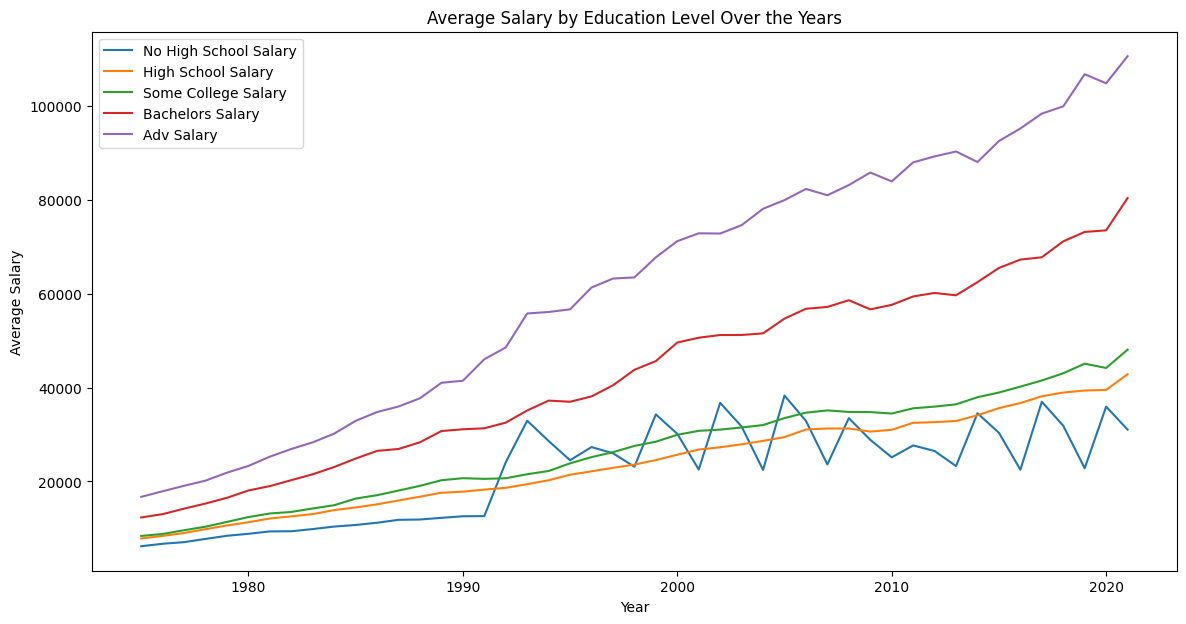

In [26]:
# Let's load the data again to ensure we have the correct DataFrame to work with
file_path = './data/salary_clean.csv'
salaries_df = pd.read_csv(file_path)

# Now, let's plot the average salary for different education levels over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Assuming the DataFrame has a column for each education level with the format "<level>_salary"
# And assuming the 'year' column is already in a suitable format (e.g., datetime or numerical)
for column in ['no_high_school_salary', 'high_school_salary', 'some_college_salary', 'bachelors_salary', 'adv_salary']:
    plt.plot(salaries_df['year'], salaries_df[column], label=column.replace('_', ' ').title())

plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary by Education Level Over the Years')
plt.legend()
plt.show()


In [27]:
!pip install tensorflow


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# # from tensorflow.keras 
# from keras.layers import LSTM, Dense
# from keras.callbacks import EarlyStopping
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

# # Load the dataset
# df = pd.read_csv('./data/salary_clean.csv')  # replace with your file path

# # Sort the data based on 'year' if necessary
# df.sort_values('year', inplace=True)

# # Normalize the salary data
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(df['total_earners_salary'].values.reshape(-1, 1))

# # Split the data into train and test sets
# train_size = int(len(scaled_data) * 0.80)
# test_size = len(scaled_data) - train_size
# train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# # Convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
#     X, Y = [], []
#     for i in range(len(dataset)-look_back-1):
#         a = dataset[i:(i+look_back), 0]
#         X.append(a)
#         Y.append(dataset[i + look_back, 0])
#     return np.array(X), np.array(Y)

# # Reshape into X=t and Y=t+1
# look_back = 1  # number of previous time steps to consider
# X_train, Y_train = create_dataset(train, look_back)
# X_test, Y_test = create_dataset(test, look_back)

# # Reshape input to be [samples, time steps, features]
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(50, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# # Fit the model
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2, validation_data=(X_test, Y_test), callbacks=[early_stop], shuffle=False)

# # Make predictions
# train_predict = model.predict(X_train)
# test_predict = model.predict(X_test)

# # Invert predictions to actual scale
# train_predict = scaler.inverse_transform(train_predict)
# Y_train_inv = scaler.inverse_transform([Y_train])
# test_predict = scaler.inverse_transform(test_predict)
# Y_test_inv = scaler.inverse_transform([Y_test])

# # Calculate RMSE
# train_score = mean_squared_error(Y_train_inv[0], train_predict[:, 0], squared=False)
# test_score = mean_squared_error(Y_test_inv[0], test_predict[:, 0], squared=False)
# print(f'Train Score: {train_score:.2f} RMSE')
# print(f'Test Score: {test_score:.2f} RMSE')

# # Plot training & validation loss values
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Train')
# plt.plot(history.history['val_loss'], label='Test')
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

# # Plot baseline and predictions
# plt.figure(figsize=(12, 6))
# plt.plot(Y_test_inv[0], label='Actual')
# plt.plot(test_predict[:, 0], label='Predicted')
# plt.title('Test Prediction')
# plt.ylabel('Total Earners Salary')
# plt.xlabel('Time Point')
# plt.legend(loc='best')
# plt.show()

In [29]:
salaries_df

,year,total_earners,total_earners_salary,no_high_school_earners,no_high_school_salary,high_school_earners,high_school_salary,some_college_earners,some_college_salary,bachelors_earners,bachelors_salary,adv_earners,adv_salary
0,2021,165282,63050,10886,31050,43930,42850,44019,48070,41873,80380,24572,110600
1,2020,164611,72520,10985,35940,42240,39498,45240,44176,41910,73499,24236,104833
2,2019,167216,52380,11414,22810,42599,39371,46886,45091,42153,73163,24164,106766
3,2018,165179,64340,12058,31870,42882,38936,46887,43053,40231,71155,23118,99919
4,2017,163871,74320,12240,36980,42816,38145,47382,41507,39153,67763,22277,98369
5,2016,162218,52590,12281,22490,42897,36702,48128,40201,37272,67267,21639,95203
6,2015,161074,69240,13159,30360,42404,35615,47961,38943,36348,65482,21199,92525
7,2014,158000,80930,13197,34530,42529,34099,47023,37945,35305,62466,19944,88056
8,2013,156031,55880,12961,23270,42433,32881,46952,36428,34422,59661,19261,90304
9,2012,155148,50260,13030,26490,41915,32630,47469,35943,33948,60159,18783,89253


In [30]:
salaries_df['year'] = pd.to_datetime(salaries_df['year'], format='%Y')
salaries_df.set_index('year', inplace=True)
salaries_df.sort_index(inplace=True)

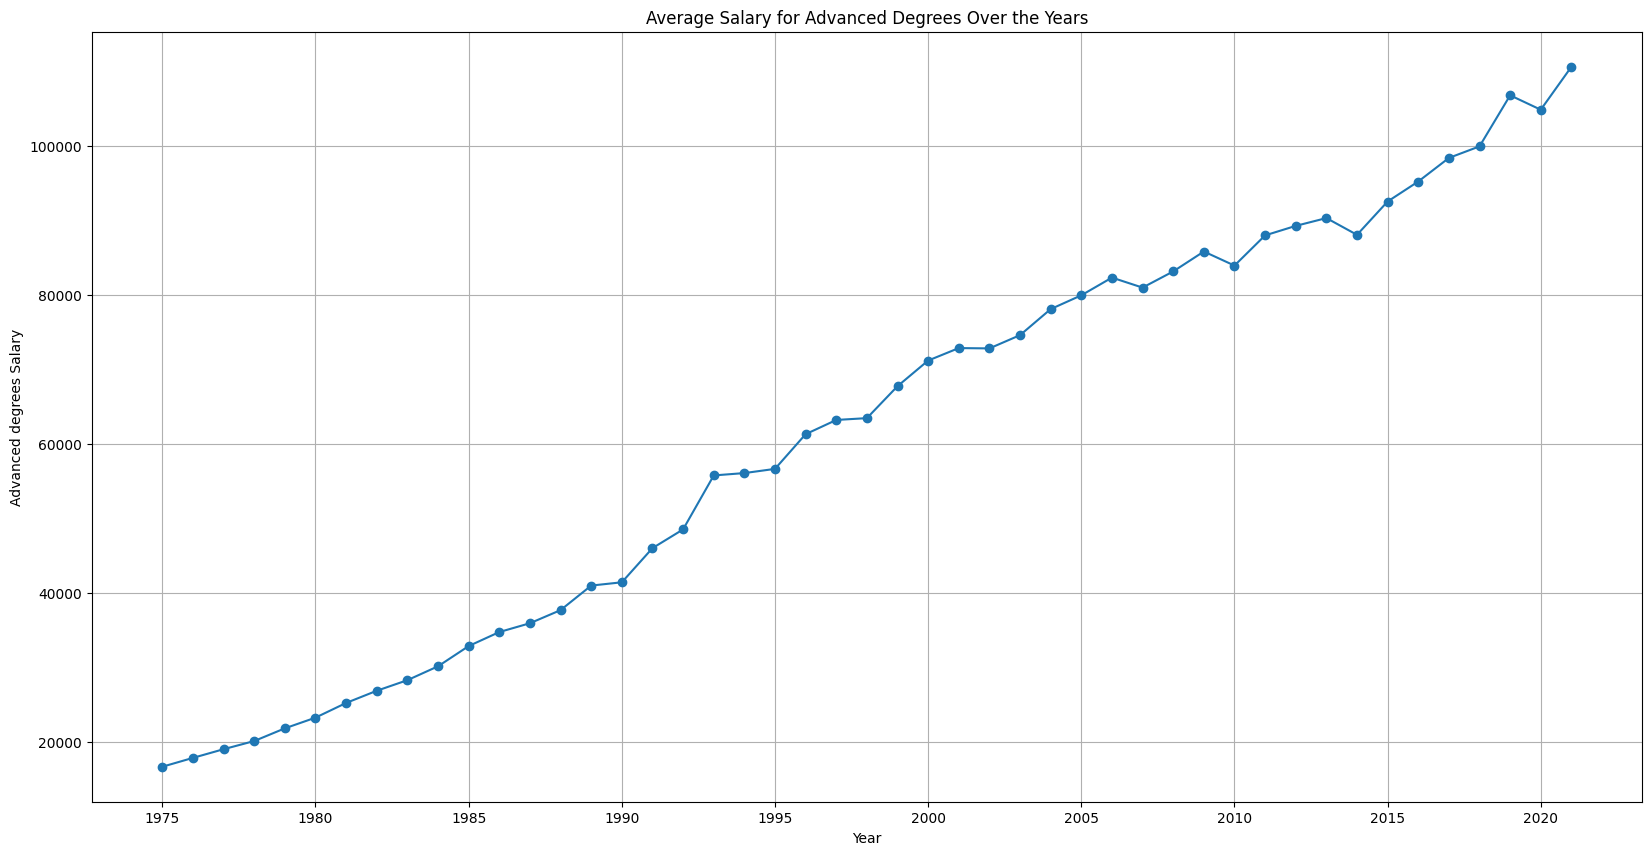

In [31]:
plt.figure(figsize=(20, 10))
plt.xlabel("Year")
plt.ylabel("Advanced degrees Salary")
plt.plot(salaries_df.index, salaries_df['adv_salary'], marker='o')  # Adjusted for 'year' as index
plt.title("Average Salary for Advanced Degrees Over the Years")
plt.grid(True)
plt.show()

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time

- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [32]:
rolmean = salaries_df['adv_salary'].rolling(window=5).mean()
rolstd = salaries_df['adv_salary'].rolling(window=5).std()

print(salaries_df['adv_salary'].head(15))
print()
print(rolmean.head(15))
print()
print(rolstd.head(15))

year
1975-01-01    16725
1976-01-01    17911
1977-01-01    19077
1978-01-01    20173
1979-01-01    21874
1980-01-01    23308
1981-01-01    25281
1982-01-01    26915
1983-01-01    28333
1984-01-01    30192
1985-01-01    32909
1986-01-01    34787
1987-01-01    35968
1988-01-01    37724
1989-01-01    41019
Name: adv_salary, dtype: int64

year
1975-01-01        NaN
1976-01-01        NaN
1977-01-01        NaN
1978-01-01        NaN
1979-01-01    19152.0
1980-01-01    20468.6
1981-01-01    21942.6
1982-01-01    23510.2
1983-01-01    25142.2
1984-01-01    26805.8
1985-01-01    28726.0
1986-01-01    30627.2
1987-01-01    32437.8
1988-01-01    34316.0
1989-01-01    36481.4
Name: adv_salary, dtype: float64

year
1975-01-01            NaN
1976-01-01            NaN
1977-01-01            NaN
1978-01-01            NaN
1979-01-01    1992.972654
1980-01-01    2156.535949
1981-01-01    2467.644889
1982-01-01    2673.169224
1983-01-01    2616.711237
1984-01-01    2663.185818
1985-01-01    2955.877196
198

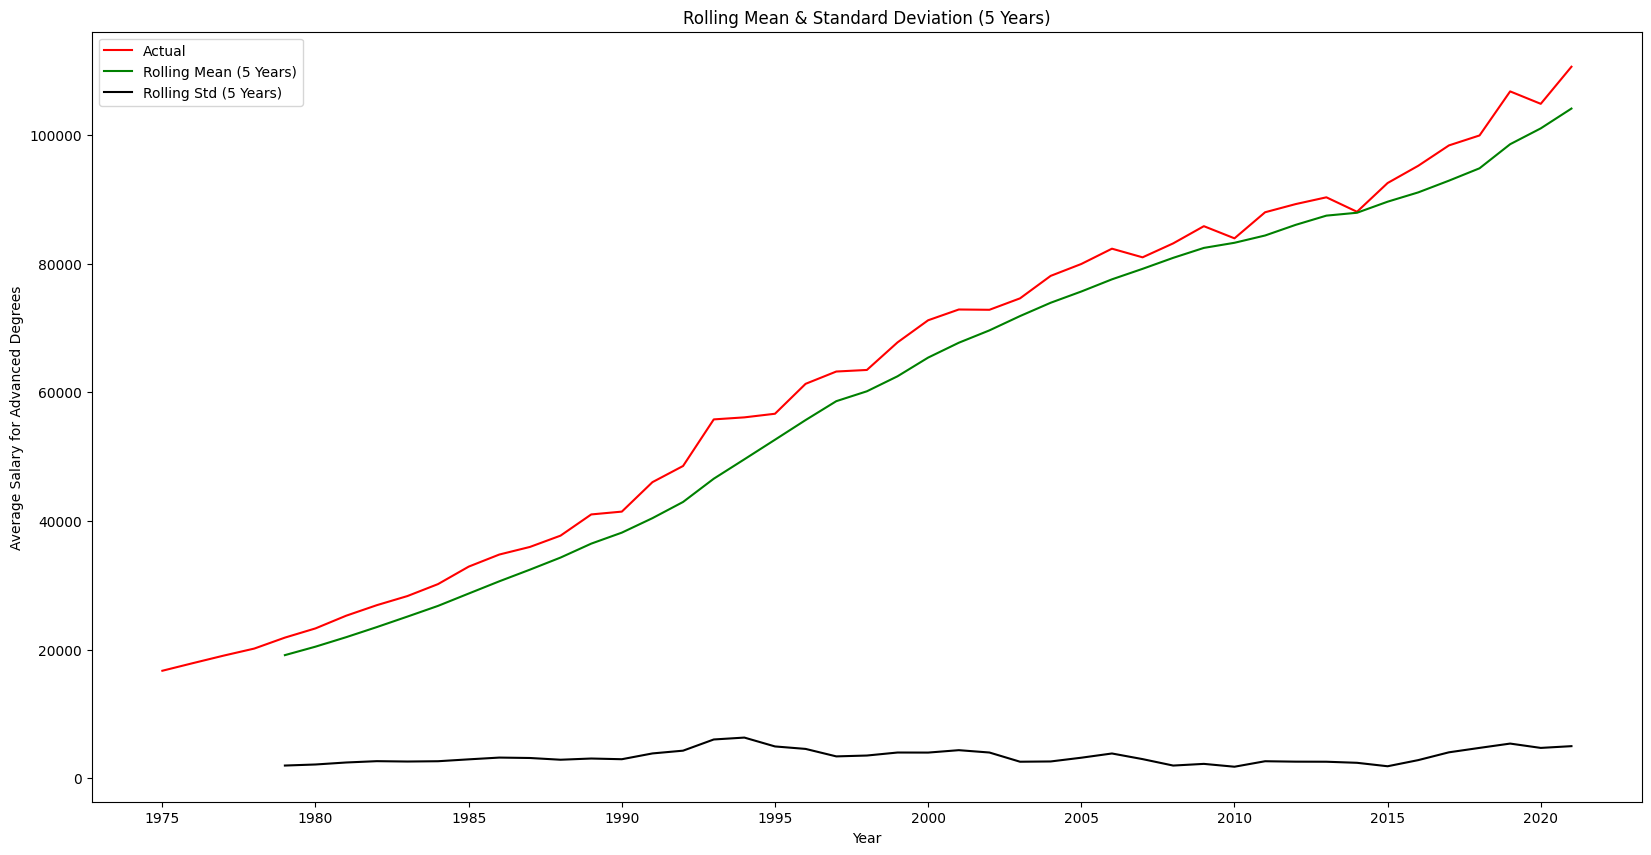

In [35]:
plt.figure(figsize=(20, 10))
actual = plt.plot(salaries_df.index, salaries_df['adv_salary'], color='red', label='Actual')
mean_5 = plt.plot(rolmean, color='green', label='Rolling Mean (5 Years)')
std_5 = plt.plot(rolstd, color='black', label='Rolling Std (5 Years)')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (5 Years)')
plt.xlabel('Year')
plt.ylabel('Average Salary for Advanced Degrees')
plt.show(block=False)

In [37]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
sal_test=adfuller(salaries_df['adv_salary'], autolag='AIC')
sal_output=pd.Series(sal_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in sal_test[4].items():
    sal_output['Critical Value (%s)'%key] = value
print(sal_output)

Dickey-Fuller Test: 
Test Statistic                  0.255128
p-value                         0.975189
Lags Used                       1.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : Null hypothesis - Time Series is non-stationary

- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05


- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with no seasonality

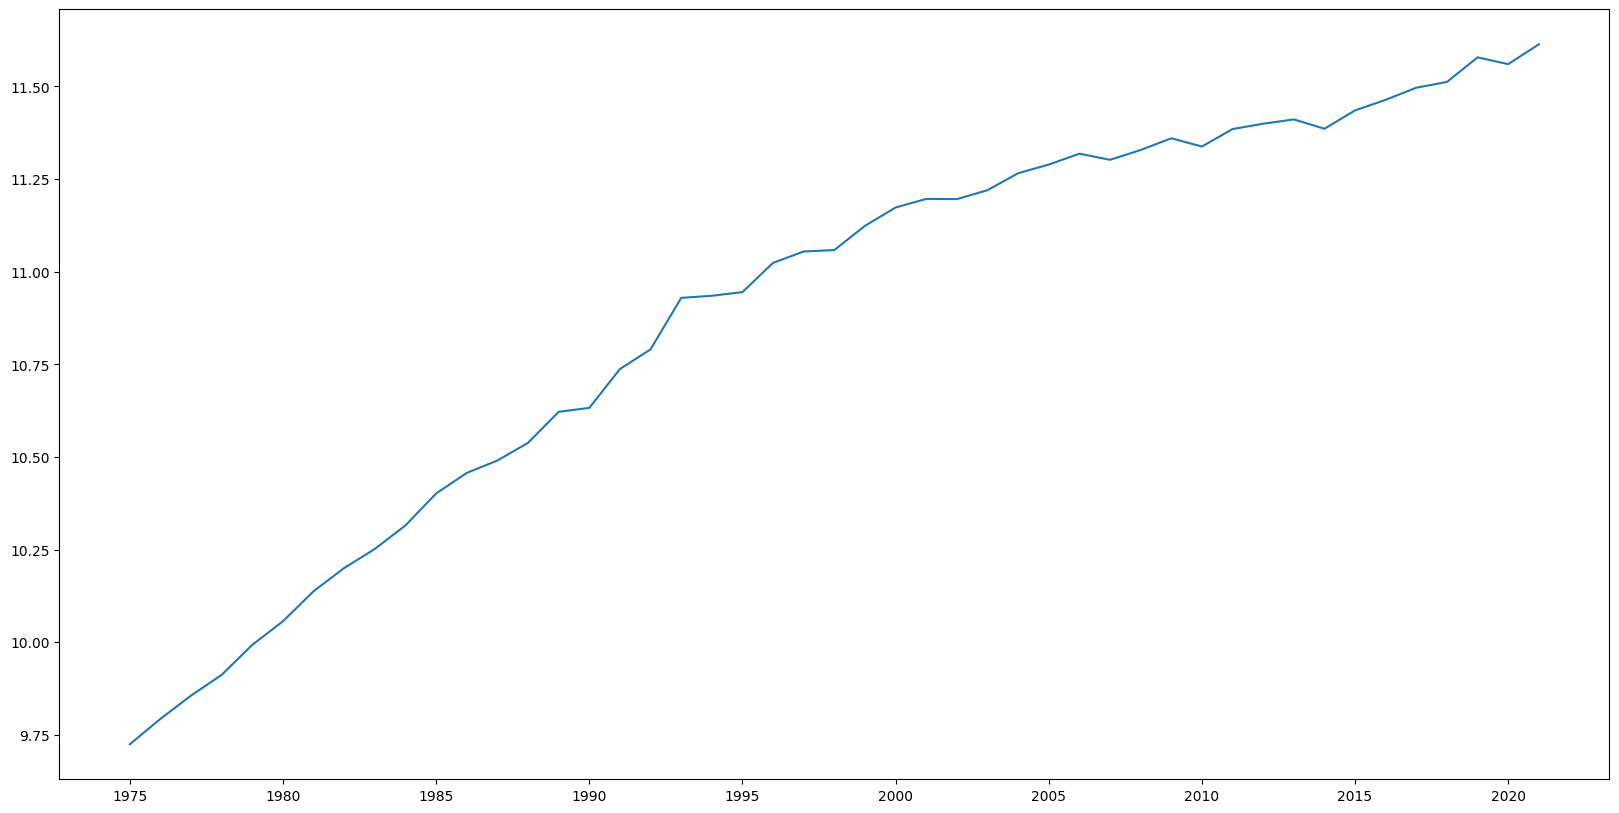

In [38]:
plt.figure(figsize=(20,10))
sal_data_log=np.log(salaries_df['adv_salary'])
plt.plot(salaries_df.index, sal_data_log)

In [39]:
sal_data_log = sal_data_log.sort_index()
sal_data_log.index = pd.DatetimeIndex(sal_data_log.index, freq='AS-JAN')
sal_data_log.dropna(inplace=True)
sal_data_log

C:\Users\pdmil\AppData\Local\Temp\ipykernel_11996\1468058449.py:2: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  sal_data_log.index = pd.DatetimeIndex(sal_data_log.index, freq='AS-JAN')


year
1975-01-01     9.724660
1976-01-01     9.793170
1977-01-01     9.856239
1978-01-01     9.912100
1979-01-01     9.993054
1980-01-01    10.056552
1981-01-01    10.137808
1982-01-01    10.200439
1983-01-01    10.251782
1984-01-01    10.315332
1985-01-01    10.401501
1986-01-01    10.456999
1987-01-01    10.490385
1988-01-01    10.538052
1989-01-01    10.621791
1990-01-01    10.632436
1991-01-01    10.737222
1992-01-01    10.790308
1993-01-01    10.929332
1994-01-01    10.934980
1995-01-01    10.944947
1996-01-01    11.023812
1997-01-01    11.054518
1998-01-01    11.058370
1999-01-01    11.123668
2000-01-01    11.173164
2001-01-01    11.196419
2002-01-01    11.195801
2003-01-01    11.219923
2004-01-01    11.265656
2005-01-01    11.289107
2006-01-01    11.318369
2007-01-01    11.301920
2008-01-01    11.328329
2009-01-01    11.359984
2010-01-01    11.337738
2011-01-01    11.384876
2012-01-01    11.399230
2013-01-01    11.410937
2014-01-01    11.385728
2015-01-01    11.435234
2016-01-01 

In [40]:
sal_data_log.isna().sum()

0

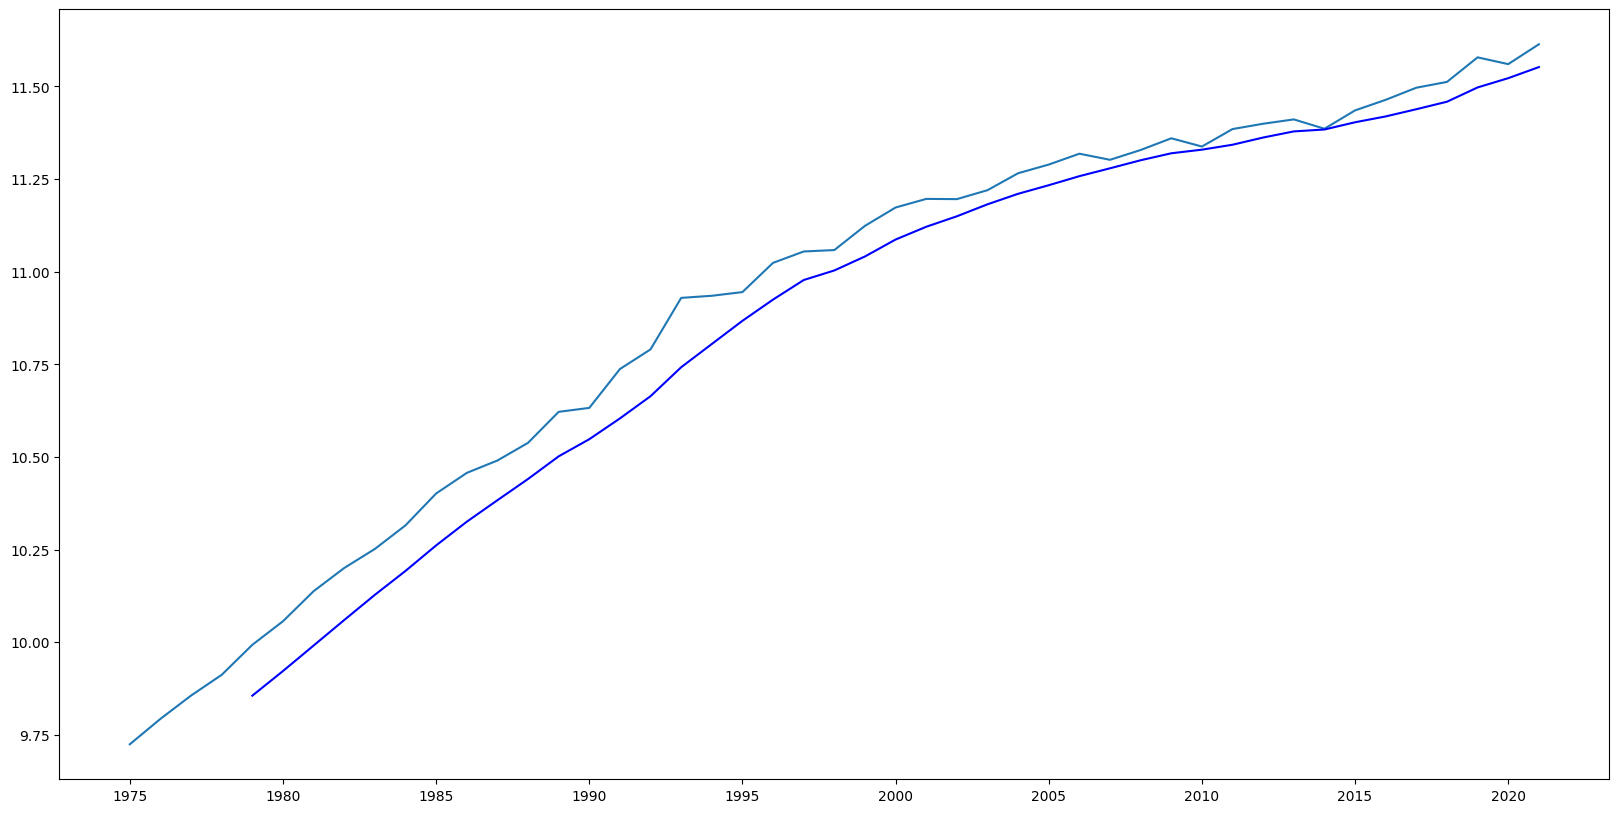

In [41]:
plt.figure(figsize=(20,10))
log_MA=sal_data_log.rolling(window=5).mean()
log_MStd=sal_data_log.rolling(window=5).std()
plt.plot(sal_data_log)
plt.plot(log_MA, color='blue')

Testing Rolling Mean with window 5 on above log transformation and concluded non-stationary, again

Using another method differencing, to make our time series stationary


In [42]:
sal_log_diff=sal_data_log-log_MA
sal_log_diff.head(12)

year
1975-01-01         NaN
1976-01-01         NaN
1977-01-01         NaN
1978-01-01         NaN
1979-01-01    0.137209
1980-01-01    0.134329
1981-01-01    0.146658
1982-01-01    0.140448
1983-01-01    0.123855
1984-01-01    0.122949
1985-01-01    0.140129
1986-01-01    0.131788
Freq: YS-JAN, Name: adv_salary, dtype: float64

In [43]:
sal_log_diff=sal_log_diff.dropna()
sal_log_diff.head()

year
1979-01-01    0.137209
1980-01-01    0.134329
1981-01-01    0.146658
1982-01-01    0.140448
1983-01-01    0.123855
Freq: YS-JAN, Name: adv_salary, dtype: float64

Defining function for Rolling Mean and Standard Deviation & ADF test


In [44]:
def check_stationarity(earnings_series):
    
    rolling_mean=earnings_series.rolling(window=5).mean()
    rolling_std=earnings_series.rolling(window=5).std()
    
    plt.figure(figsize=(20,10))
    orig=plt.plot(earnings_series, color='red', label='Original')
    mean=plt.plot(rolling_mean, color='green', label='Rolling Mean') 
    std=plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    test_result=adfuller(earnings_series, autolag='AIC')
    test_output=pd.Series(test_result[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in test_result[4].items():
        test_output['Critical Value (%s)'%key] = value
    print(test_output)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

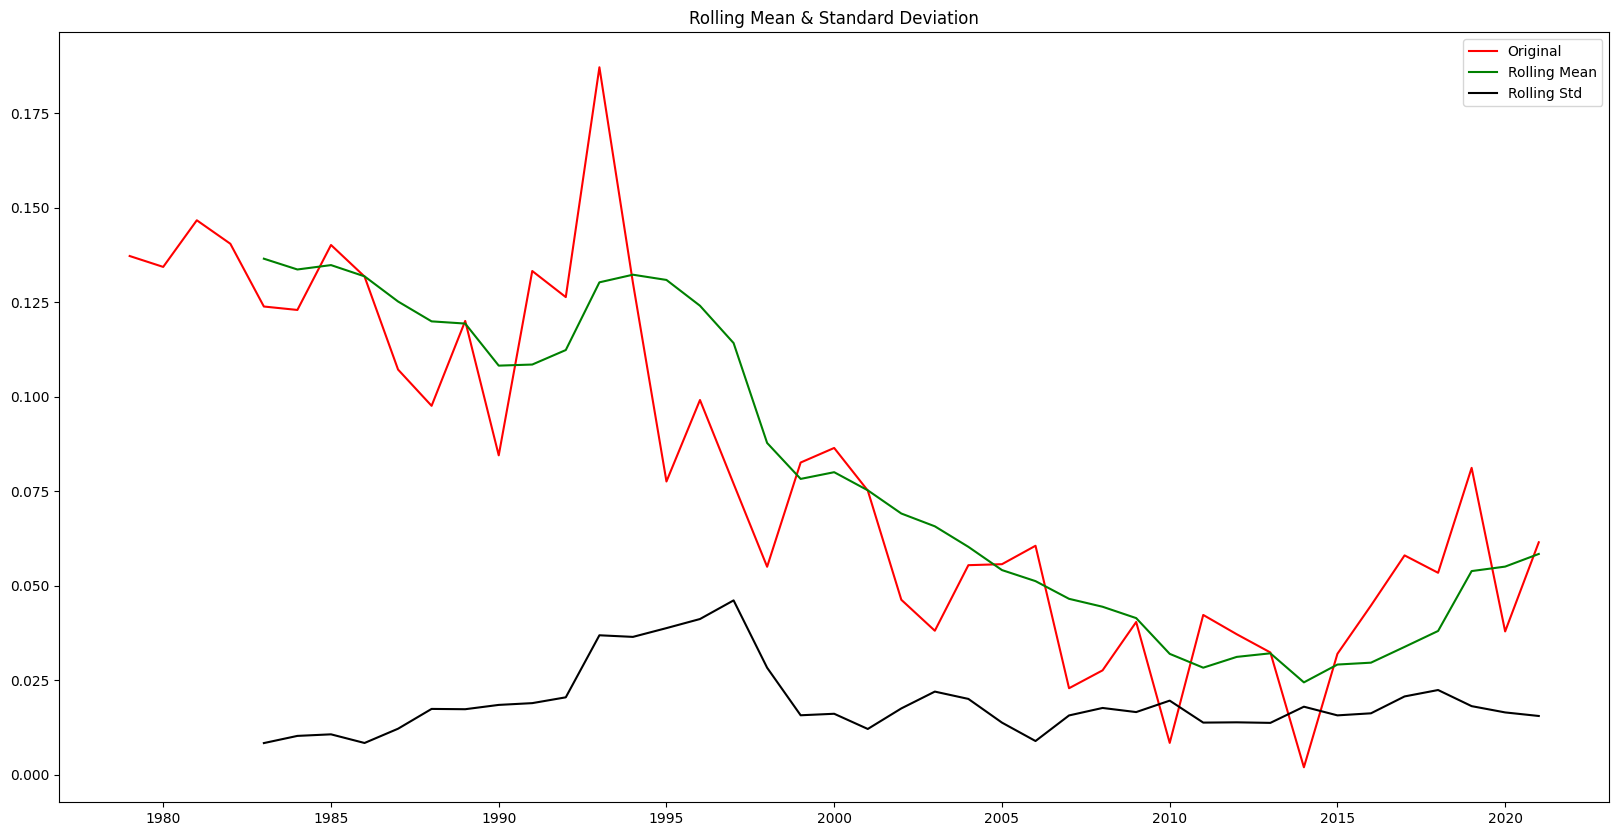

Dickey-Fuller Test: 
Test Statistic                 -1.632792
p-value                         0.466030
Lags Used                       1.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [45]:
check_stationarity(sal_log_diff)

Checking for Trend stationarity and performing exponential transformation on our data


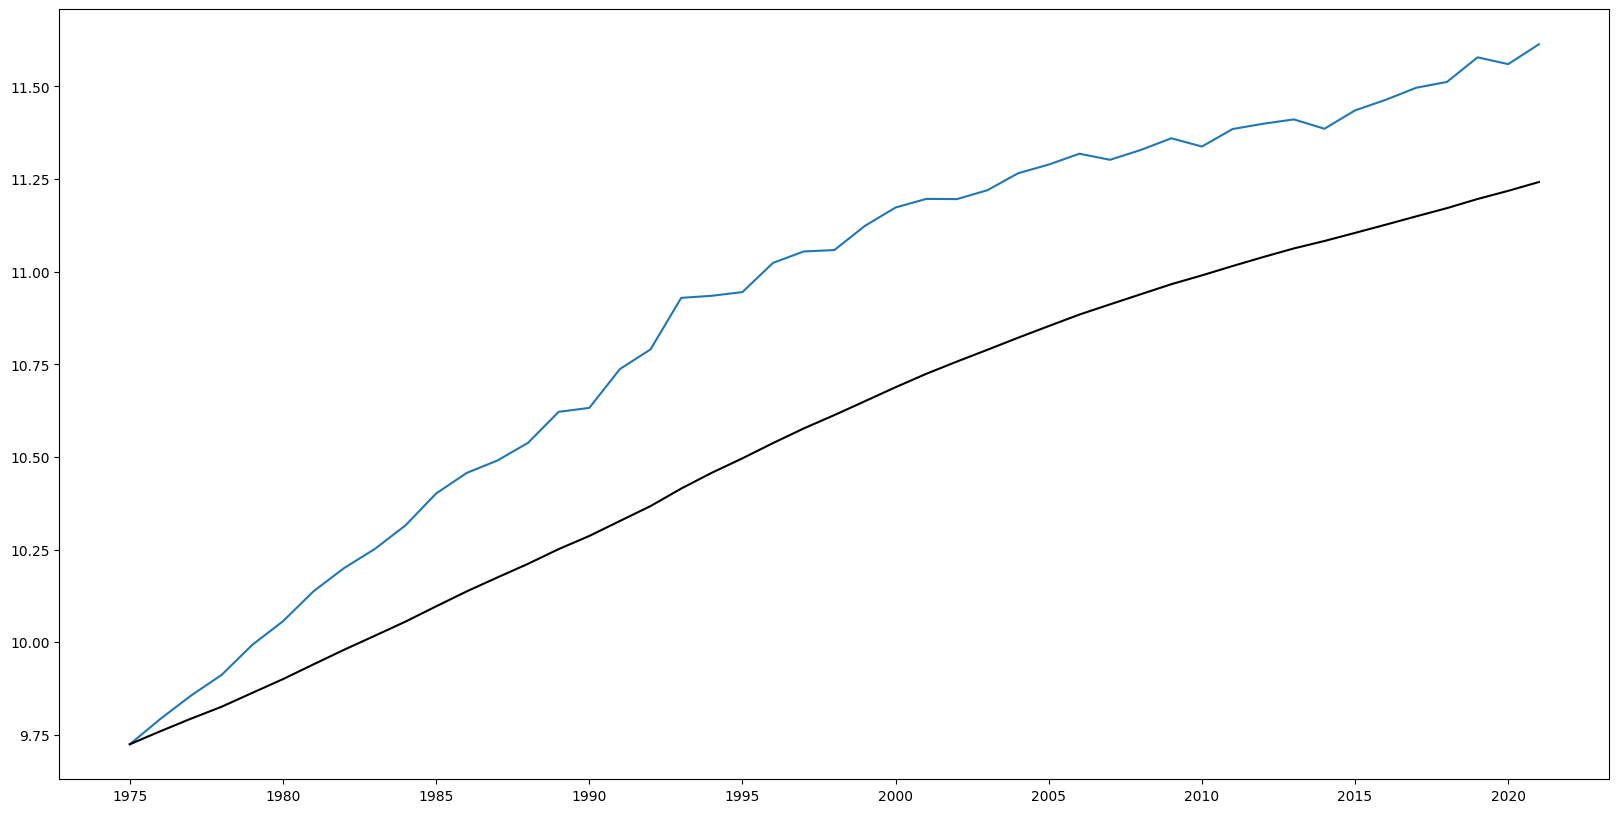

In [46]:
plt.figure(figsize=(20,10))
exp_sal_data=sal_data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(sal_data_log)
plt.plot(exp_sal_data, color='black')

Since log transformation is non-stationary, applying differencing on our data.

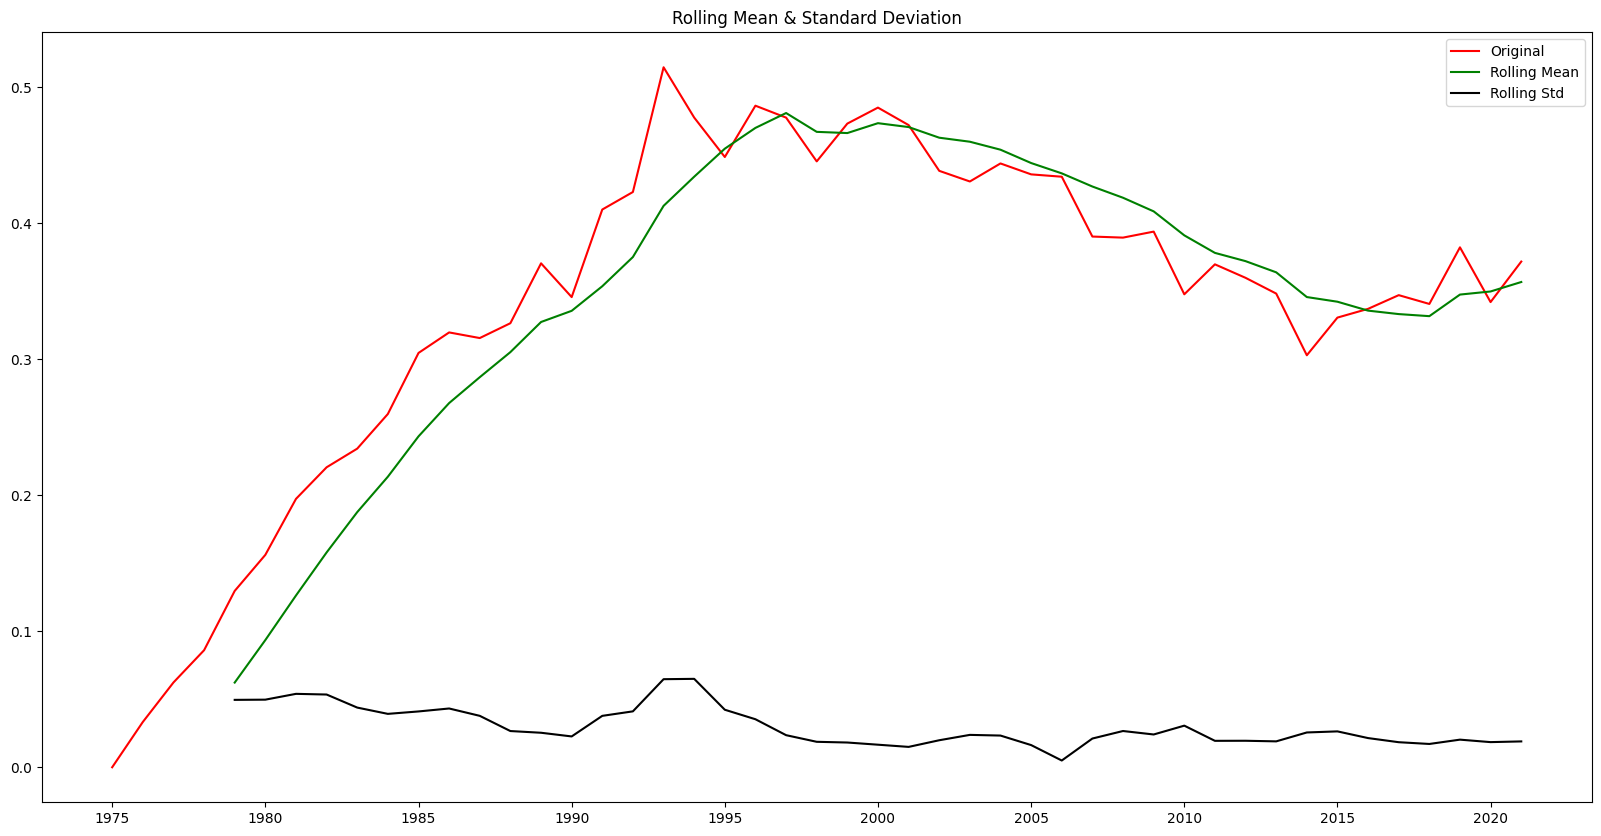

Dickey-Fuller Test: 
Test Statistic                 -3.407611
p-value                         0.010702
Lags Used                       0.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [48]:
exp_sal_diff=sal_data_log-exp_sal_data
check_stationarity(exp_sal_diff)

From above graph and ADF test, we conclude, it is trend stationary

Eliminating Trend and Seasonality

Differencing:

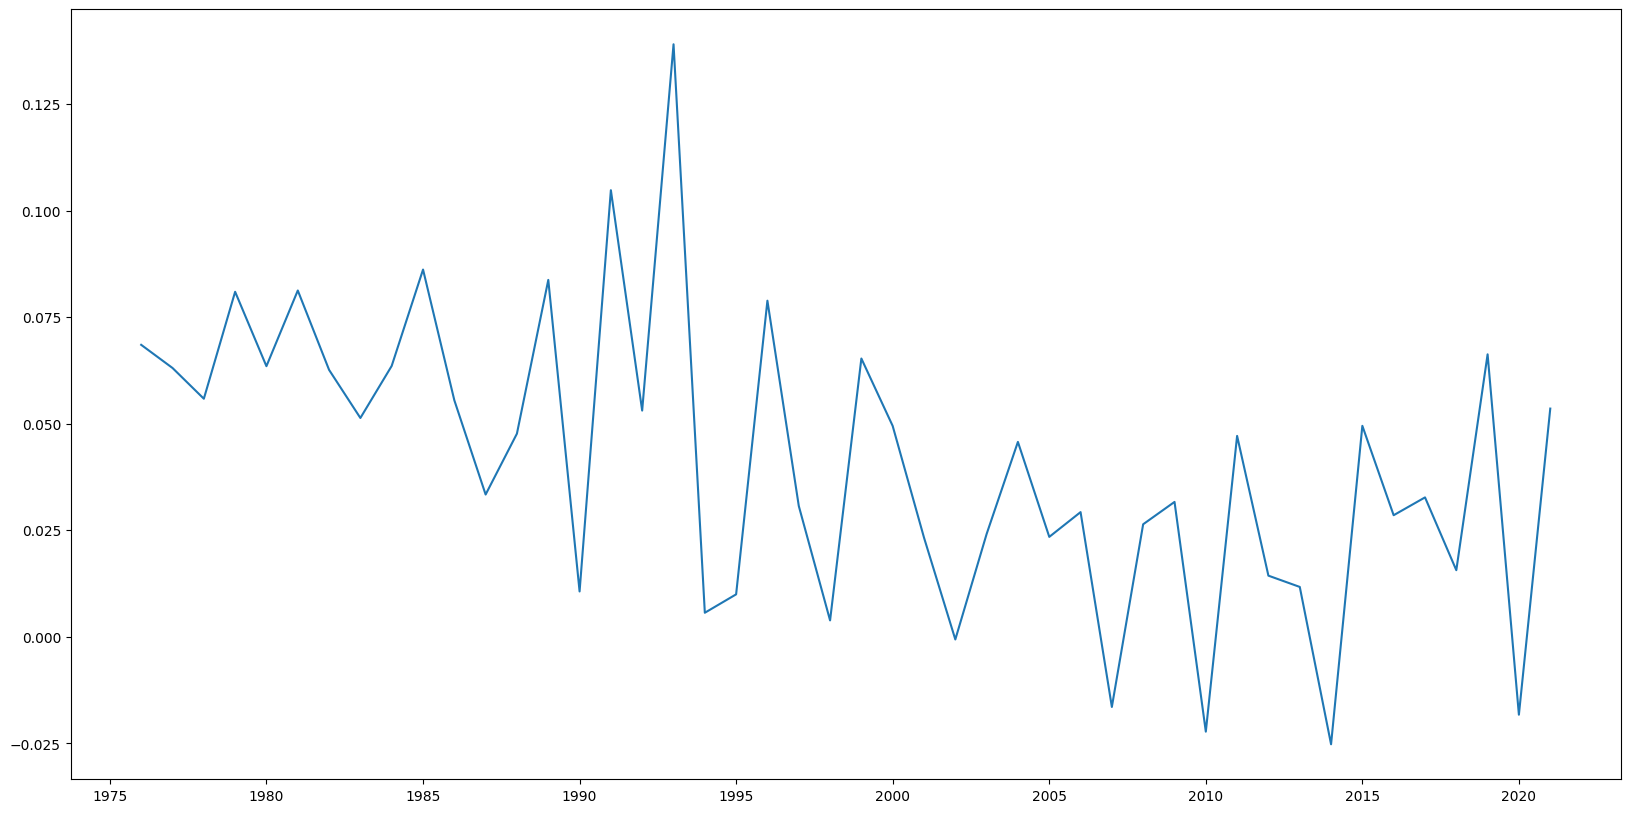

In [49]:
plt.figure(figsize=(20,10))
sal_data_shift=sal_data_log-sal_data_log.shift()
plt.plot(sal_data_shift)

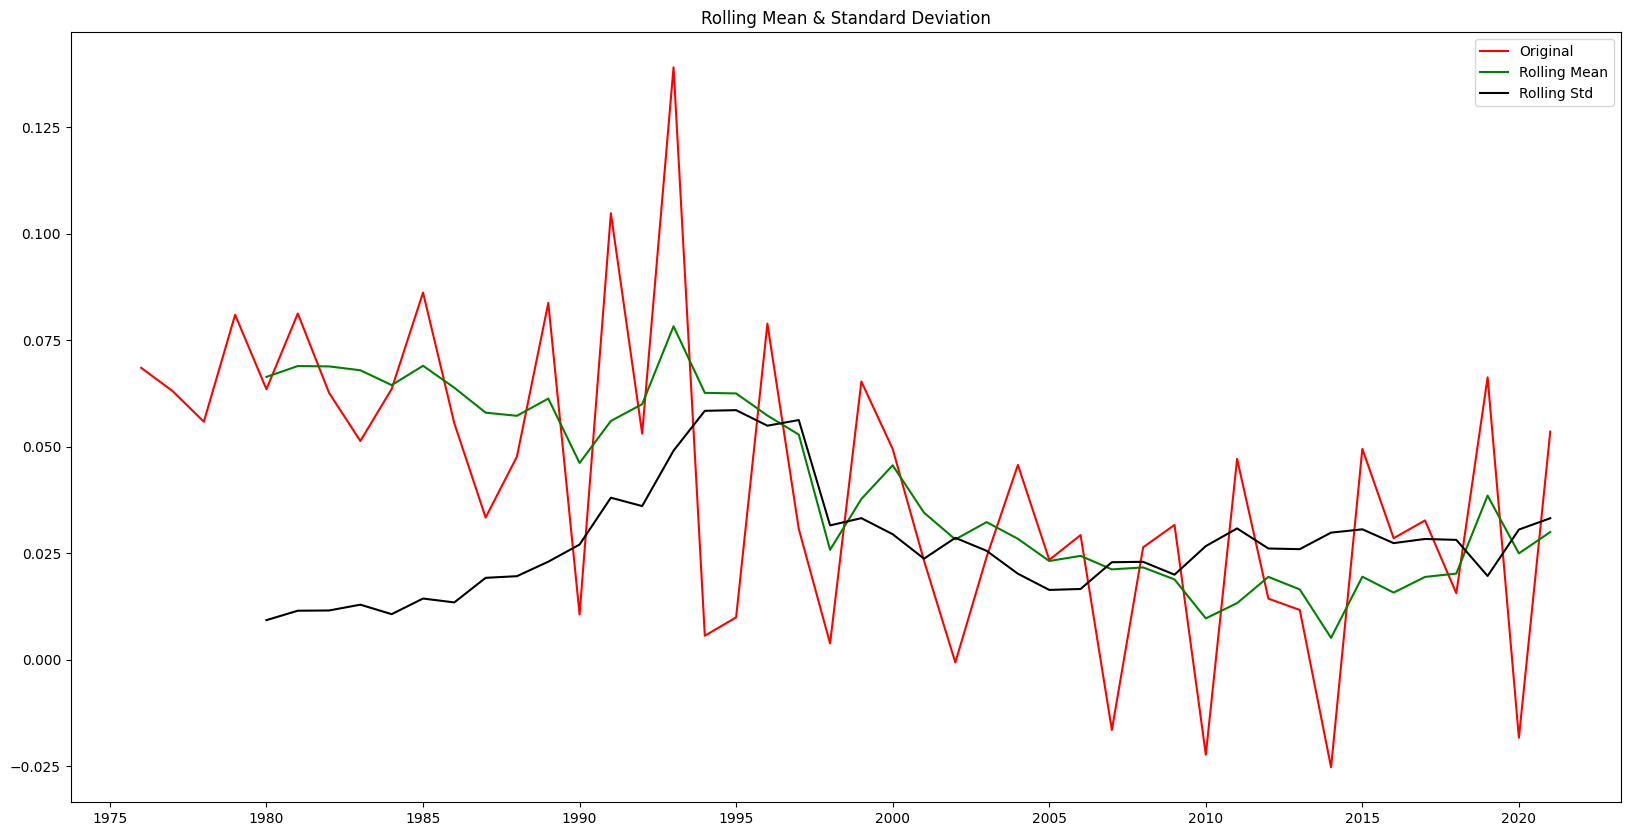

Dickey-Fuller Test: 
Test Statistic                 -1.527593
p-value                         0.519820
Lags Used                       3.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [50]:
sal_data_shift=sal_data_shift.dropna()
check_stationarity(sal_data_shift)

Decomposition:

Decomposing Time Series into its components : Trend, Seasonality and Residual


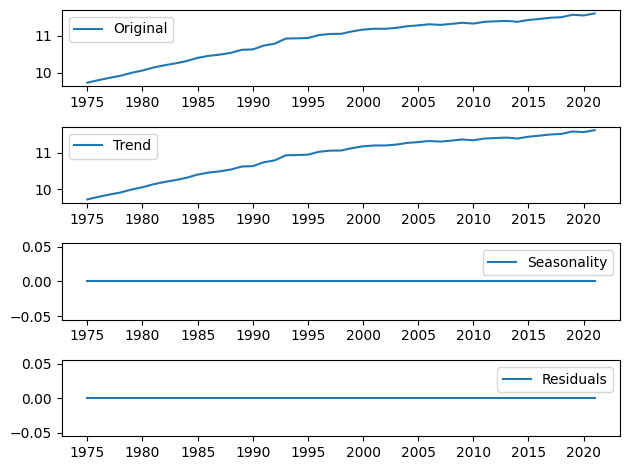

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(sal_data_log, model='additive')

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid
residual.dropna(inplace=True)

plt.subplot(411)
plt.plot(sal_data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

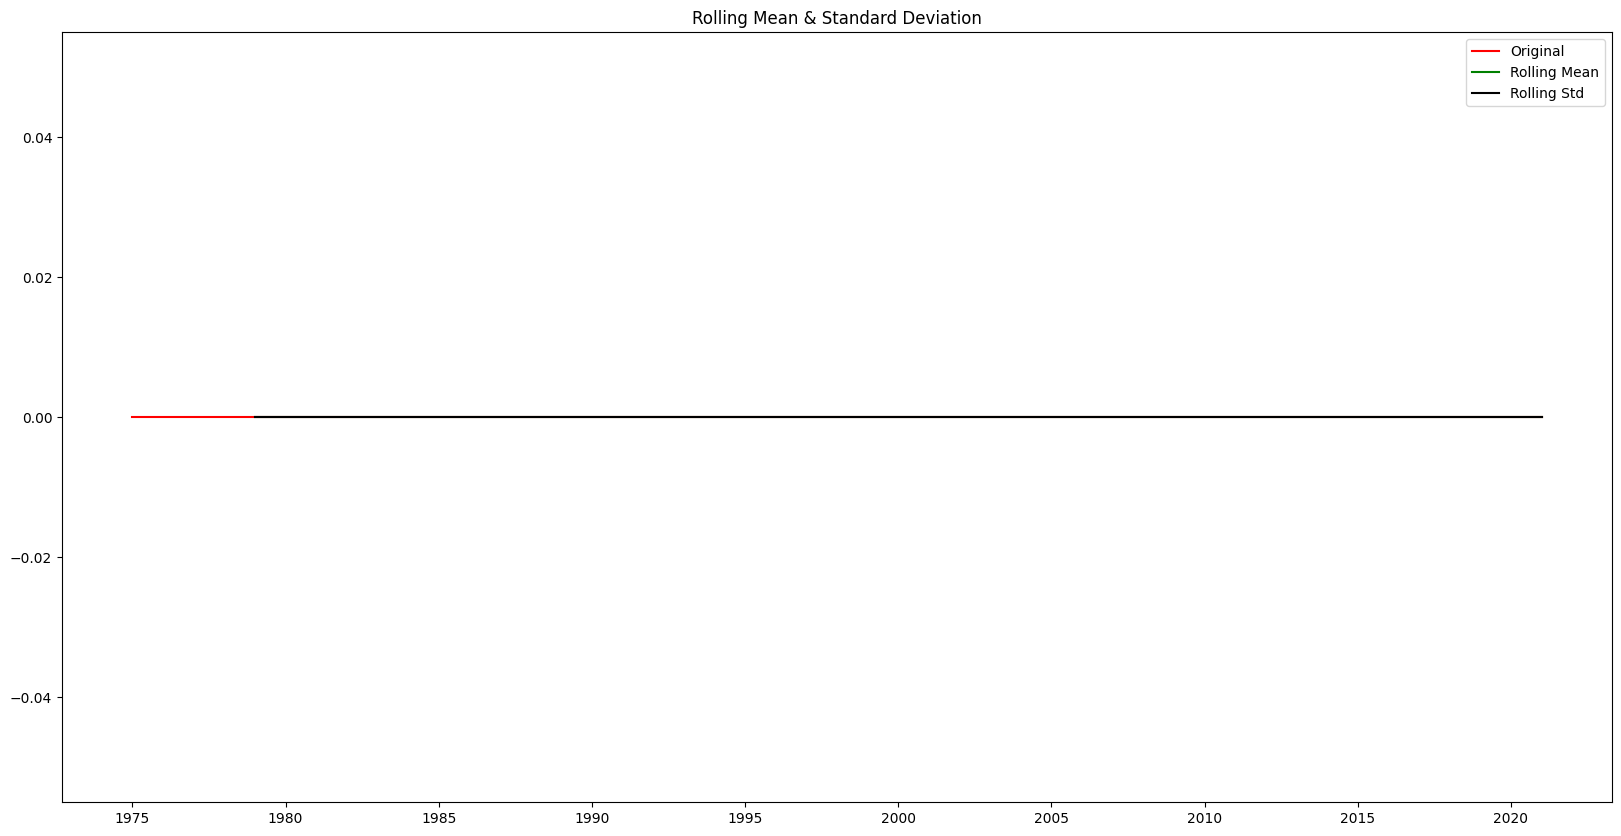

Dickey-Fuller Test: 


ValueError: Invalid input, x is constant

In [52]:
sal_log_decompose = residual
sal_log_decompose.dropna(inplace=True)
check_stationarity(sal_log_decompose)

 confirm that the residuals are stationary.

Plotting the ACF and PACF to find q and p value

We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

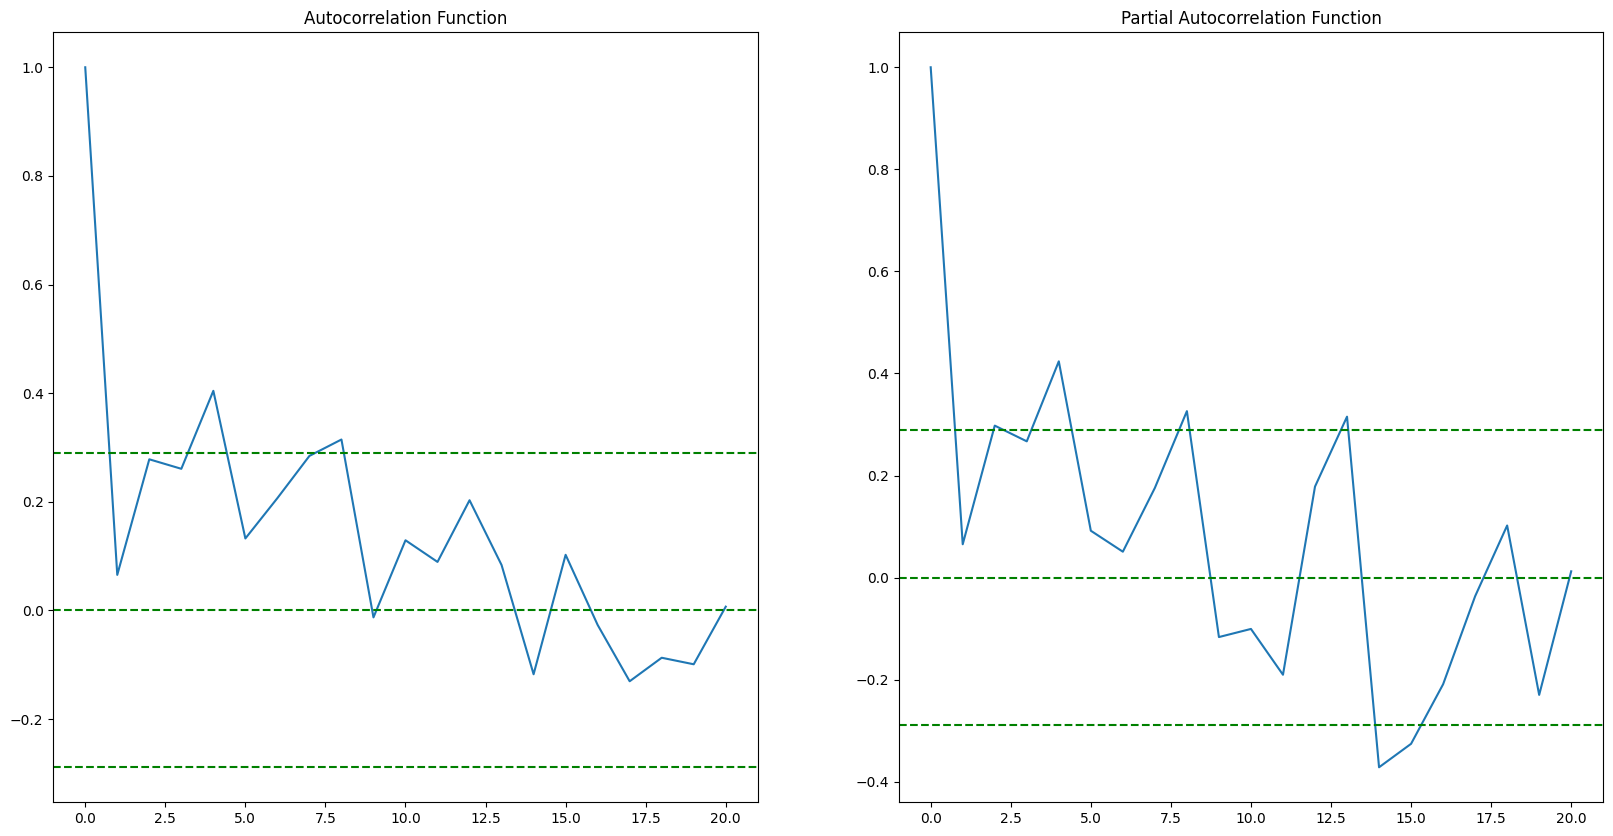

In [53]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(sal_data_shift, nlags=20)
lag_pacf=pacf(sal_data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(sal_data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(sal_data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(sal_data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(sal_data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

The values where it first hits off 0 are the corresponding P and Q

P (AR (p) PACF ) lags at 2 and Q ( MA (q)  ACF )also lags at 2

Building the ARIMA model with p=2, q=2 and I=1

### AR Model:

Text(0.5, 1.0, 'RSS: 5454.4947')

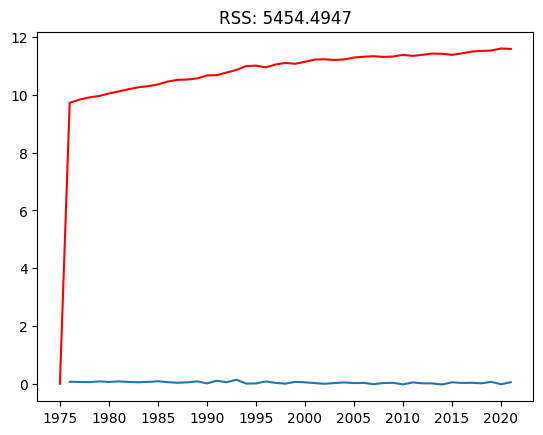

In [54]:
#AR model:
model = ARIMA(sal_data_log, order=(2, 1, 0))  
results_AR = model.fit()  
plt.plot(sal_data_shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues[sal_data_shift.index]-sal_data_shift)**2))

### MA Model:

Text(0.5, 1.0, 'RSS: 5437.9991')

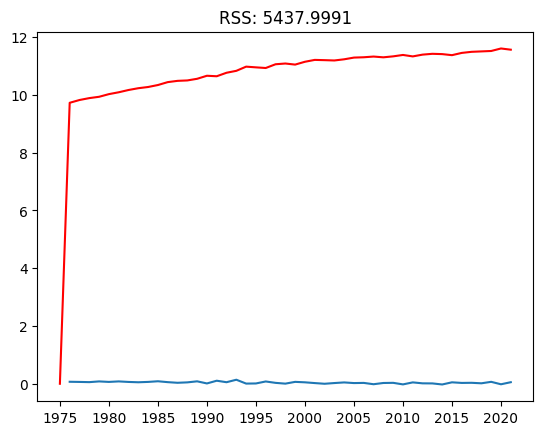

In [55]:
model = ARIMA(sal_data_log, order=(0, 1, 2))  
results_MA = model.fit()  
plt.plot(sal_data_shift)
plt.plot(results_MA.fittedvalues, color='red')
RSS = sum((results_MA.fittedvalues[sal_data_shift.index] - sal_data_shift) ** 2)
plt.title(f'RSS: {RSS:.4f}')

### ARIMA Model:

Text(0.5, 1.0, 'RSS: 5462.1415')

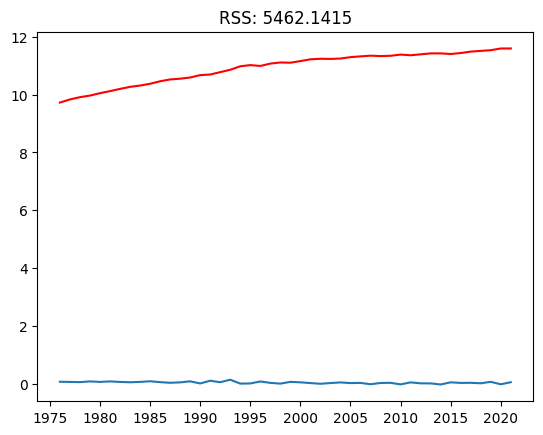

In [56]:
model = ARIMA(sal_data_log, order=(2, 1, 2))  
results_ARIMA = model.fit()  
plt.plot(sal_data_shift)
plt.plot(results_ARIMA.fittedvalues[sal_data_shift.index], color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues[sal_data_shift.index]-sal_data_shift)**2))

#### Convert to original scale:

In [99]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

year
1975-01-01    0.000000
1976-01-01    9.053920
1977-01-01    9.127295
1978-01-01    9.180020
1979-01-01    9.271619
Freq: AS-JAN, dtype: float64


In [100]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

year
1975-01-01     0.000000
1976-01-01     9.053920
1977-01-01    18.181215
1978-01-01    27.361235
1979-01-01    36.632854
Freq: AS-JAN, dtype: float64


In [101]:
sal_data_log.index

DatetimeIndex(['1975-01-01', '1976-01-01', '1977-01-01', '1978-01-01',
               '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01'],
              dtype='datetime64[ns]', name='year', freq='AS-JAN')

In [102]:
sal_data_log.iloc[0]

9.053920452704881

In [103]:
predictions_ARIMA_log = pd.Series(sal_data_log.iloc[0], index=sal_data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

year
1975-01-01     9.053920
1976-01-01    18.107841
1977-01-01    27.235136
1978-01-01    36.415155
1979-01-01    45.686774
Freq: AS-JAN, dtype: float64

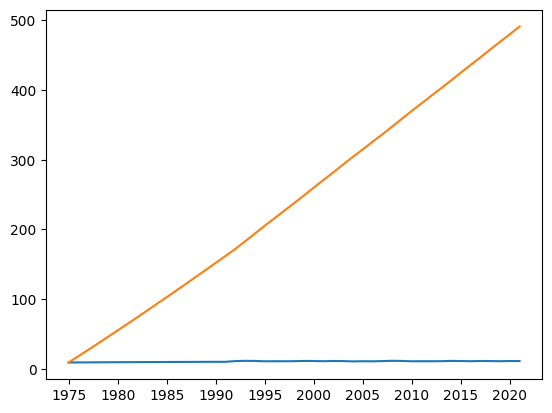

In [104]:
plt.plot(sal_data_log)
plt.plot(predictions_ARIMA_log)